# Data Visualization with matplotlib
We will use the package `matplotlib`.
```
import matplotlib.pyplot as plt
```
- line plot
    - linear plot
    - log plot
- level set plot
- color plot
- vector field plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

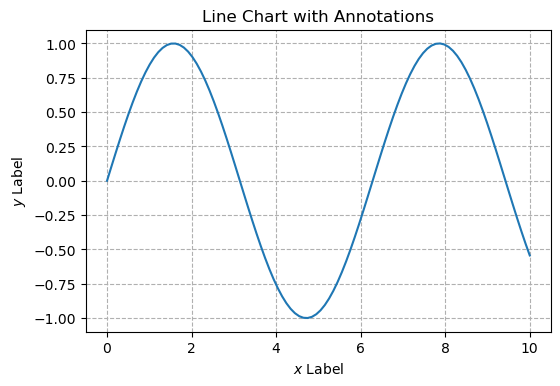

In [3]:
# you first plot 
x = np.linspace(0,10,100)
plt.figure(figsize=(6, 4),dpi=100)
plt.plot(x,np.sin(x))

# Add title and labels
plt.title('Line Chart with Annotations')
plt.xlabel('$x$ Label')
plt.ylabel('$y$ Label')

# Display grid
plt.grid(True,linestyle='dashed')

# Show the plot
plt.show()

Exercise 1
Plot a $\tanh(x)$ and $\mathrm{sech}(x)$ in the same figure.
Some hints
```
plt.plot(x,np.tanh(x),label='tanh')  # Add a label for the legend
plt.plot(x,1/np.cosh(x),label='sech')  # Add a label for the legend
plt.legend()
```

![ex1 plot](ex1.png)
